In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

In [2]:
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

TRAIN_SET_LABEL = 'noncoding'

In [3]:
import pandas as pd 

def get_observations_and_mchale_predictions_on_chen_windows(kmer_size, train_set_label, noisy_label):
    # zscores were computed using dist/model-germline-grch38-Nonly.kmerSize-X.trainSet-Y{Z}.json                                                                  
    filename = f'{CONSTRAINT_TOOLS_DATA}/genome-wide-predictions/predict-germline-grch38-Nonly.chenWindows.kmerSize-{kmer_size}.trainSet-{train_set_label}{noisy_label}.bed'
    df = pd.read_csv(filename, sep='\t')
    return df

get_observations_and_mchale_predictions_on_chen_windows(kmer_size=3, train_set_label=TRAIN_SET_LABEL, noisy_label='.noisified')

,chromosome,start,end,position,N_bar,N_observed,N_mean_null,N_variance_null
0,chr1,1432000,1433000,1432500,-0.283079,260,264.038617,203.540686
1,chr1,1435000,1436000,1435500,-7.609011,275,389.032484,224.595337
2,chr1,1449000,1450000,1449500,0.225283,225,221.996472,177.748203
3,chr1,1450000,1451000,1450500,2.147648,313,282.634862,199.905291
4,chr1,1451000,1452000,1451500,2.332657,293,260.580640,193.155585
...,...,...,...,...,...,...,...,...
1796995,chr22,50224000,50225000,50224500,0.425725,254,248.099121,192.121344
1796996,chr22,50227000,50228000,50227500,1.182923,283,266.223120,201.144968
1796997,chr22,50228000,50229000,50228500,-0.349426,241,245.934204,199.398832
1796998,chr22,50229000,50230000,50229500,-1.355873,231,249.853718,193.355386


In [4]:
def get_mchale_predictions_on_chen_windows(kmer_size, train_set_label, noisy_label):
    columns = ['chromosome', 'start', 'end', 'N_bar']
    df = get_observations_and_mchale_predictions_on_chen_windows(kmer_size, train_set_label, noisy_label)[columns]
    new_Nbar_header = f'N_bar_{kmer_size}_{train_set_label}'
    if noisy_label == '.noisified': new_Nbar_header += '_noisy'
    df = df.rename(columns={
        'N_bar': new_Nbar_header
    })
    return df

def get_observations_on_chen_windows(kmer_size, train_set_label, noisy_label):
    columns = ['chromosome', 'start', 'end', 'N_observed']
    df = get_observations_and_mchale_predictions_on_chen_windows(kmer_size, train_set_label, noisy_label)[columns]
    return df

get_mchale_predictions_on_chen_windows(kmer_size=3, train_set_label=TRAIN_SET_LABEL, noisy_label='.noisified')

,chromosome,start,end,N_bar_3_noncoding_noisy
0,chr1,1432000,1433000,-0.283079
1,chr1,1435000,1436000,-7.609011
2,chr1,1449000,1450000,0.225283
3,chr1,1450000,1451000,2.147648
4,chr1,1451000,1452000,2.332657
...,...,...,...,...
1796995,chr22,50224000,50225000,0.425725
1796996,chr22,50227000,50228000,1.182923
1796997,chr22,50228000,50229000,-0.349426
1796998,chr22,50229000,50230000,-1.355873


In [5]:
from functools import reduce

on = ['chromosome', 'start', 'end']
how = 'inner'

dfs = [get_observations_on_chen_windows(kmer_size=3, train_set_label=TRAIN_SET_LABEL, noisy_label='')]

dfs.append(get_mchale_predictions_on_chen_windows(kmer_size=7, train_set_label=TRAIN_SET_LABEL, noisy_label=''))

for kmer_size in [1, 3, 5]: 
    for train_set_label in [TRAIN_SET_LABEL]: 
        for noisy_label in ['', '.noisified']:
            dfs.append(get_mchale_predictions_on_chen_windows(kmer_size, train_set_label, noisy_label))

mchale_predictions = reduce(
    lambda left, right: pd.merge(left, right, on=on, how=how), 
    dfs
)

mchale_predictions

,chromosome,start,end,N_observed,N_bar_7_noncoding,N_bar_1_noncoding,N_bar_1_noncoding_noisy,N_bar_3_noncoding,N_bar_3_noncoding_noisy,N_bar_5_noncoding,N_bar_5_noncoding_noisy
0,chr1,1432000,1433000,260,-0.372778,1.590921,1.676924,-0.247615,-0.283079,-0.339806,-0.340167
1,chr1,1435000,1436000,275,-6.280673,2.097960,2.193623,-7.547130,-7.609011,-6.810107,-6.784165
2,chr1,1449000,1450000,225,0.139977,0.959620,1.011359,0.258359,0.225283,0.330975,0.330023
3,chr1,1450000,1451000,313,2.524948,5.870332,5.950235,2.197534,2.147648,2.480911,2.482902
4,chr1,1451000,1452000,293,2.951595,4.803930,4.877094,2.367303,2.332657,2.725116,2.724052
...,...,...,...,...,...,...,...,...,...,...,...
1796995,chr22,50224000,50225000,254,0.557227,2.153889,2.222849,0.460666,0.425725,0.496005,0.493078
1796996,chr22,50227000,50228000,283,1.371285,3.418013,3.501684,1.220947,1.182923,1.340543,1.334261
1796997,chr22,50228000,50229000,241,-0.330285,0.518173,0.598786,-0.317039,-0.349426,-0.348897,-0.357060
1796998,chr22,50229000,50230000,231,-1.225998,0.509033,0.576911,-1.323602,-1.355873,-1.250236,-1.246767


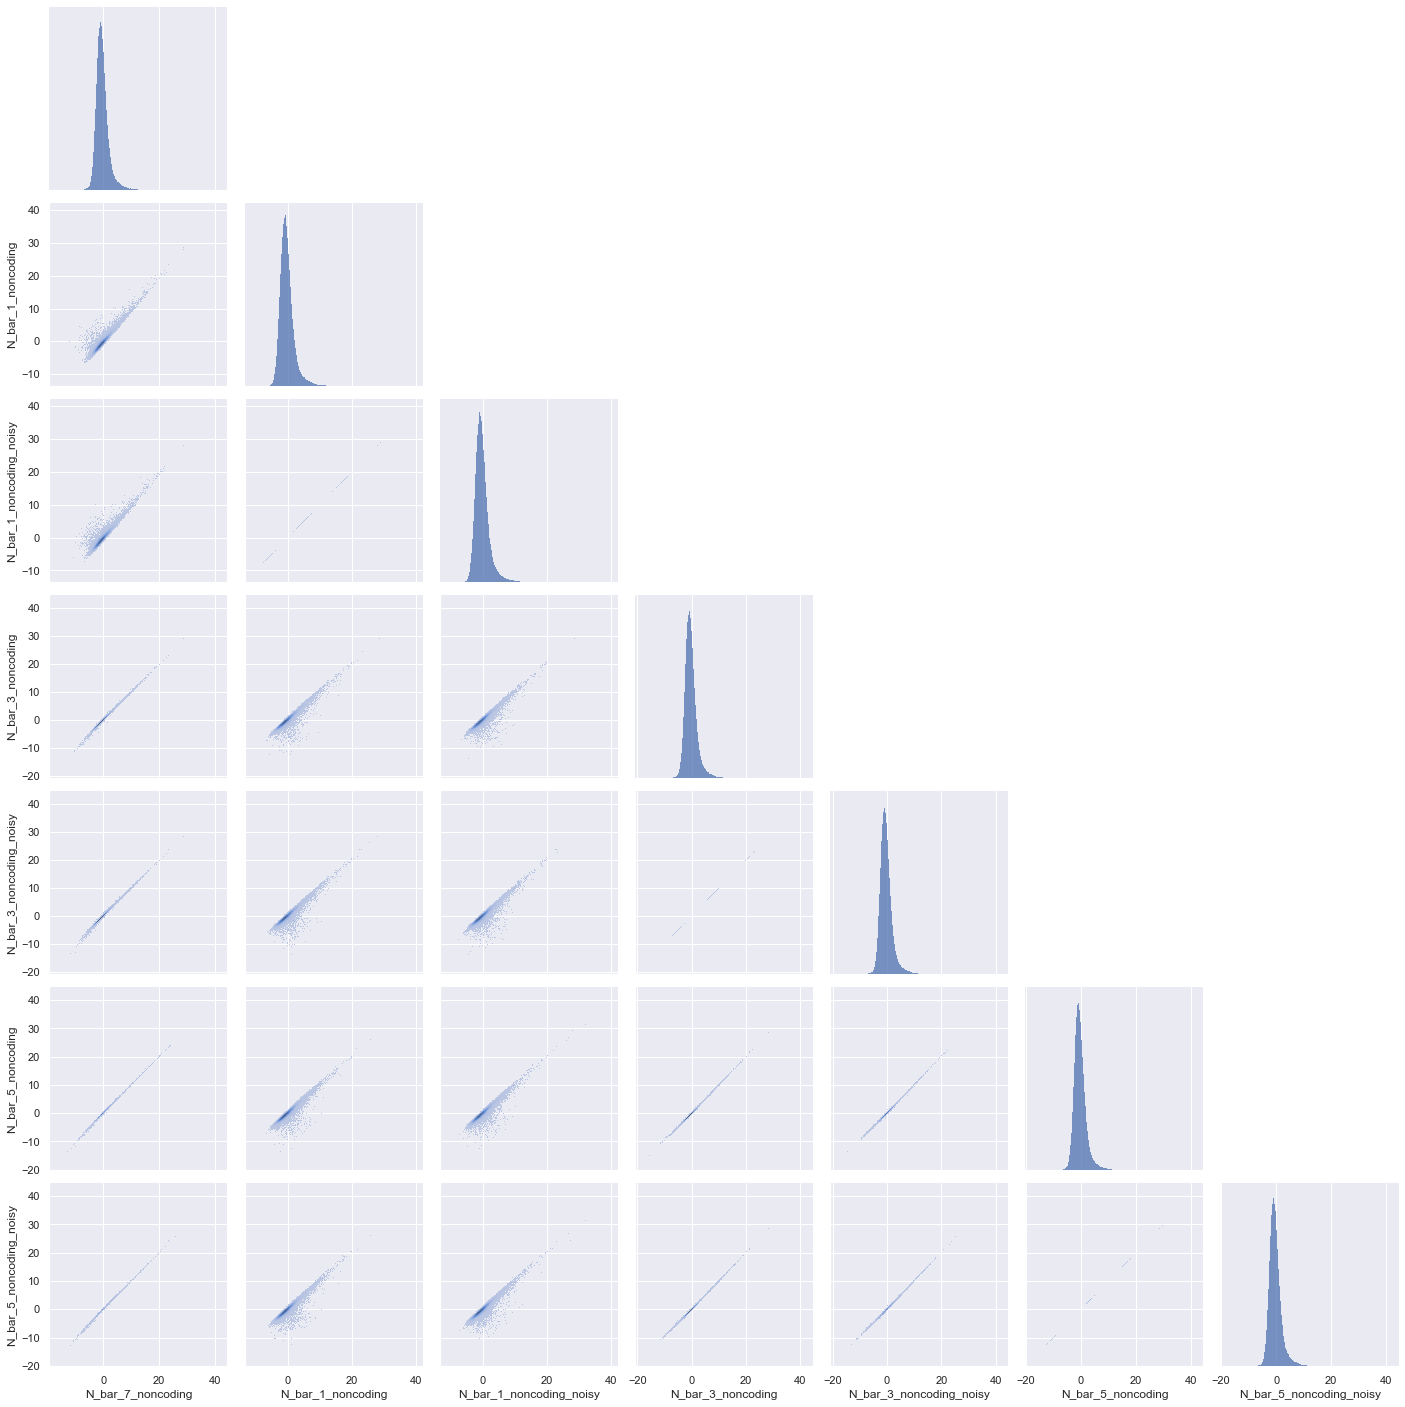

In [6]:
import seaborn as sns 
sns.set(font_scale = 1)

import matplotlib.pyplot as plt 

def pairplot(df):
    df = df.drop(columns=['chromosome', 'start', 'end', 'N_observed'])
    g = sns.pairplot(df, corner=True, kind='hist')
    fig = plt.gcf()
    fig.set_size_inches(20, 20)

pairplot(mchale_predictions)

In [7]:
mchale_predictions.to_csv(
    f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/mchale.kmerSizes.trainSets.noisy.bed', 
    sep = '\t',
    index = False
)